# LaBraM — PhysioNet EEGMMIDB (All Runs, 4-Class: Real/Imagined × Left/Right)

**Goal:** Fine-tune a pretrained LaBraM checkpoint on PhysioNet EEGMMIDB to predict **4 classes**:
- Real-Left, Real-Right, Imagined-Left, Imagined-Right

**Runs used (EEGMMIDB):**
- **Real:** 3, 7, 11
- **Imagined:** 4, 8, 12

In [1]:
# Step 1 — Environment / paths / LaBraM registration sanity

import os, sys
from pathlib import Path
import torch
import timm

PROJECT_ROOT = Path.cwd()
LABRAM_ROOT = PROJECT_ROOT / "LaBraM"
DATA_ROOT = PROJECT_ROOT / "data" / "physionet.org" / "files" / "eegmmidb" / "1.0.0"
DATALOADER_FILE = PROJECT_ROOT / "dataloader" / "eegmmidb_labram_physionet_allruns_4class.py"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("LABRAM_ROOT:", LABRAM_ROOT, "exists?", LABRAM_ROOT.exists())
print("DATA_ROOT:", DATA_ROOT, "exists?", DATA_ROOT.exists())
print("DATALOADER_FILE:", DATALOADER_FILE, "exists?", DATALOADER_FILE.exists())

# Make sure LaBraM code is importable and registers models into timm
if str(LABRAM_ROOT) not in sys.path:
    sys.path.insert(0, str(LABRAM_ROOT))

import modeling_finetune  # registers labram_* models

print("LaBraM model registered?", "labram_base_patch200_200" in timm.list_models())
print("Torch:", torch.__version__, "| CUDA available:", torch.cuda.is_available())

PROJECT_ROOT: /home/jovyan/projects/neuro-eeg
LABRAM_ROOT: /home/jovyan/projects/neuro-eeg/LaBraM exists? True
DATA_ROOT: /home/jovyan/projects/neuro-eeg/data/physionet.org/files/eegmmidb/1.0.0 exists? True
DATALOADER_FILE: /home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py exists? True
LaBraM model registered? True
Torch: 2.8.0+cu128 | CUDA available: True


In [2]:
# Step 2 — Quick smoke test: load dataset, verify shapes and label distribution

from dataloader.eegmmidb_labram_physionet_allruns_4class import (
    EEGMMIDBLaBraMAllRuns4ClassDataset,
    PreprocConfig,
    BCI22_CHANNELS,
    LABRAM_64_MAP,
)

ds = EEGMMIDBLaBraMAllRuns4ClassDataset(
    root_path=str(DATA_ROOT),
    subjects=None,                 # all subjects
    runs=[3, 4, 7, 8, 11, 12],      # real + imagined
    t_min=0.0,
    t_max=4.0,
    normalization=True,
    is_train=True,
    add_noise_std=0.0,
    preproc=PreprocConfig(
        target_sfreq=200.0,
        notch_hz=50.0,
        l_freq=0.1,
        h_freq=75.0,
        reref="average",
        to_microvolts=True,
    ),
)

print("Dataset length:", len(ds))
s = ds[0]
print("x shape:", tuple(s["inputs"].shape), "dtype:", s["inputs"].dtype)
print("label:", int(s["labels"]))
print("task_type:", s["meta"]["task_type"], "| run:", s["meta"]["run"], "| label_name:", s["meta"]["label_name"])

# label histogram
import numpy as np
ys = np.array([int(ds[i]["labels"]) for i in range(min(len(ds), 5000))])
vals, cnts = np.unique(ys, return_counts=True)
print("Label ids present:", vals.tolist())
print("Counts (first 5000 samples):", dict(zip(vals.tolist(), cnts.tolist())))

# check A dimension is 4
assert s["inputs"].shape[1] == 4 and s["inputs"].shape[2] == 200, "Expected (22, 4, 200)"
print("OK: inputs are (22, 4, 200)")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)
/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)
/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)
/home/jovyan/projects/neuro-eeg/dataloader/eegmmidb_labram_physionet_allruns_4class.py:176: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [16]:
# Step 3 — Build LaBraM input_chans vector (used for positional embeddings)
# IMPORTANT: must include 0 (CLS token), then mapped indices for the 22 channels in our order.

mapped = [LABRAM_64_MAP[ch] for ch in BCI22_CHANNELS]
input_chans = torch.tensor([0] + mapped, dtype=torch.long)
print("input_chans shape:", tuple(input_chans.shape), "first 10:", input_chans[:10].tolist())

input_chans shape: (23,) first 10: [0, 2, 10, 11, 12, 13, 14, 26, 27, 28]


In [3]:
# Step 4 — Subject-wise split (train/val/test) + DataLoaders

import numpy as np
import torch
from torch.utils.data import DataLoader, Subset

# --- Collect subject ids per sample
subjects_per_sample = np.array([int(ds[i]["meta"]["subject"]) for i in range(len(ds))])
unique_subjects = np.unique(subjects_per_sample)

print("Num subjects found:", len(unique_subjects))
print("First 10 subjects:", unique_subjects[:10].tolist())

# --- Split subjects (reproducible)
SEED = 42
rng = np.random.default_rng(SEED)

shuffled = unique_subjects.copy()
rng.shuffle(shuffled)

n_subj = len(shuffled)
n_train = int(round(0.80 * n_subj))
n_val = int(round(0.10 * n_subj))
n_test = n_subj - n_train - n_val

train_subjects = set(shuffled[:n_train])
val_subjects   = set(shuffled[n_train:n_train + n_val])
test_subjects  = set(shuffled[n_train + n_val:])

print("\nSplit sizes:")
print("train subjects:", len(train_subjects))
print("val subjects:  ", len(val_subjects))
print("test subjects: ", len(test_subjects))

# --- Build indices
train_idx = np.where(np.isin(subjects_per_sample, list(train_subjects)))[0]
val_idx   = np.where(np.isin(subjects_per_sample, list(val_subjects)))[0]
test_idx  = np.where(np.isin(subjects_per_sample, list(test_subjects)))[0]

print("\nSplit sample counts:")
print("train:", len(train_idx))
print("val:  ", len(val_idx))
print("test: ", len(test_idx))

train_ds = Subset(ds, train_idx.tolist())
val_ds   = Subset(ds, val_idx.tolist())
test_ds  = Subset(ds, test_idx.tolist())

# --- Collate meta into tensors/lists cleanly
def collate_fn(batch):
    xs = torch.stack([b["inputs"] for b in batch], dim=0)   # (B, 22, 4, 200)
    ys = torch.stack([b["labels"] for b in batch], dim=0)   # (B,)
    metas = [b["meta"] for b in batch]                      # list[dict]

    # turn meta list-of-dicts into dict-of-lists/tensors (easy to index)
    meta_out = {}
    for k in metas[0].keys():
        vals = [m[k] for m in metas]
        if isinstance(vals[0], (int, float, np.integer, np.floating)):
            meta_out[k] = torch.tensor(vals)
        else:
            meta_out[k] = vals
    return {"inputs": xs, "labels": ys, "meta": meta_out}

BATCH_SIZE = 32
NUM_WORKERS = 8

train_loader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True, drop_last=True,
    collate_fn=collate_fn
)
val_loader = DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True, drop_last=False,
    collate_fn=collate_fn
)
test_loader = DataLoader(
    test_ds, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True, drop_last=False,
    collate_fn=collate_fn
)

# --- Quick batch sanity check
batch = next(iter(train_loader))
print("\nBatch inputs:", tuple(batch["inputs"].shape), "Batch labels:", tuple(batch["labels"].shape))
print("Label min/max:", int(batch["labels"].min()), int(batch["labels"].max()))
print("meta keys:", list(batch["meta"].keys()))
print("meta['run'] first 10:", batch["meta"]["run"][:10].tolist())
print("meta['task_type'] first 5:", batch["meta"]["task_type"][:5])

Num subjects found: 109
First 10 subjects: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Split sizes:
train subjects: 87
val subjects:   11
test subjects:  11

Split sample counts:
train: 7864
val:   990
test:  990

Batch inputs: (32, 22, 4, 200) Batch labels: (32,)
Label min/max: 0 3
meta keys: ['subject', 'run', 'task_type', 'label_name', 'sfreq', 'ch_names', 't_min', 't_max', 'path']
meta['run'] first 10: [4, 3, 4, 4, 11, 4, 8, 3, 11, 3]
meta['task_type'] first 5: ['imagined', 'real', 'imagined', 'imagined', 'real']


In [4]:
# Step 5 — Build LaBraM (4-class) + load pretrained checkpoint + forward sanity check

import sys
from pathlib import Path
from collections import OrderedDict
import torch
import timm

PROJECT_ROOT = Path.cwd()
LABRAM_ROOT = PROJECT_ROOT / "LaBraM"
if str(LABRAM_ROOT) not in sys.path:
    sys.path.insert(0, str(LABRAM_ROOT))

import modeling_finetune  # registers LaBraM into timm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---- input_chans for LaBraM pos-embed indexing (prepend 0 for CLS token)
# NOTE: this assumes you already have BCI22_CHANNELS + LABRAM_64_MAP available from your 4-class dataloader module.
mapped = [LABRAM_64_MAP[ch] for ch in BCI22_CHANNELS]
input_chans = torch.tensor([0] + mapped, dtype=torch.long, device=device)
print("input_chans shape:", tuple(input_chans.shape), "first 10:", input_chans[:10].tolist())

# ---- Build model (num_classes=4)
model_name = "labram_base_patch200_200"
model = timm.create_model(
    model_name,
    pretrained=False,
    num_classes=4,          # <-- 4 classes now
    drop_rate=0.0,
    drop_path_rate=0.1,
    attn_drop_rate=0.0,
    drop_block_rate=None,
    use_mean_pooling=True,
    init_scale=0.001,
    use_rel_pos_bias=True,
    use_abs_pos_emb=True,   # keep True to match prior working setup
    init_values=0.1,
    qkv_bias=True,
).to(device)

# ---- Load checkpoint weights (LaBraM/checkpoints/labram-base.pth)
ckpt_path = PROJECT_ROOT / "LaBraM" / "checkpoints" / "labram-base.pth"
print("Loading checkpoint:", ckpt_path)

checkpoint = torch.load(ckpt_path, map_location="cpu", weights_only=False)

# pick the right key
checkpoint_model = checkpoint.get("model", checkpoint)

# strip 'student.' prefix if present
keys = list(checkpoint_model.keys())
if any(k.startswith("student.") for k in keys):
    new_dict = OrderedDict()
    for k in keys:
        if k.startswith("student."):
            new_dict[k[len("student."):]] = checkpoint_model[k]
    checkpoint_model = new_dict
    print("Stripped 'student.' prefix.")

# remove incompatible heads (we will train our 4-class head)
for k in ["head.weight", "head.bias", "fc_norm.weight", "fc_norm.bias"]:
    if k in checkpoint_model:
        checkpoint_model.pop(k)

# remove rel pos index buffers if present
for k in list(checkpoint_model.keys()):
    if "relative_position_index" in k:
        checkpoint_model.pop(k)

missing, unexpected = model.load_state_dict(checkpoint_model, strict=False)
print("Checkpoint loaded. Missing:", len(missing), "Unexpected:", len(unexpected))
print("Missing (first 10):", missing[:10])
print("Unexpected (first 10):", unexpected[:10])

# ---- Forward sanity check with one batch
model.eval()
batch = next(iter(train_loader))
x = batch["inputs"][:2].to(device)   # (2, 22, 4, 200)

with torch.no_grad():
    logits = model(x, input_chans=input_chans)

print("Forward OK. logits shape:", tuple(logits.shape))
print("logits:", logits.detach().cpu())

Device: cuda
input_chans shape: (23,) first 10: [0, 2, 10, 11, 12, 13, 14, 26, 27, 28]
Loading checkpoint: /home/jovyan/projects/neuro-eeg/LaBraM/checkpoints/labram-base.pth
Stripped 'student.' prefix.
Checkpoint loaded. Missing: 28 Unexpected: 5
Missing (first 10): ['blocks.0.attn.q_bias', 'blocks.0.attn.v_bias', 'blocks.1.attn.q_bias', 'blocks.1.attn.v_bias', 'blocks.2.attn.q_bias', 'blocks.2.attn.v_bias', 'blocks.3.attn.q_bias', 'blocks.3.attn.v_bias', 'blocks.4.attn.q_bias', 'blocks.4.attn.v_bias']
Unexpected (first 10): ['mask_token', 'lm_head.weight', 'lm_head.bias', 'norm.weight', 'norm.bias']
Forward OK. logits shape: (2, 4)
logits: tensor([[-1.7544e-05, -4.9344e-05, -5.6123e-04,  6.7132e-04],
        [-2.1868e-05, -1.7092e-04, -5.6228e-04,  6.7130e-04]])


In [5]:
# Step 7 — Train LaBraM (4-class) and save best checkpoint by val accuracy

import time
import numpy as np
import torch

OUT_DIR = Path.cwd() / "training_logs" / "labram_physionet_4class_allruns"
OUT_DIR.mkdir(parents=True, exist_ok=True)
print("OUT_DIR:", OUT_DIR)

# --- loss + optimizer
criterion = torch.nn.CrossEntropyLoss()

# You can tune LR later; this is a good starting point for full fine-tune
lr = 5e-5
weight_decay = 0.05
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

EPOCHS = 30
PRINT_EVERY = 100  # steps

def run_eval(model, loader, device, input_chans):
    model.eval()
    total_loss = 0.0
    n = 0
    correct = 0

    with torch.no_grad():
        for batch in loader:
            x = batch["inputs"].to(device, non_blocking=True)
            y = batch["labels"].to(device, non_blocking=True)

            logits = model(x, input_chans=input_chans)
            loss = criterion(logits, y)

            total_loss += float(loss.item()) * x.size(0)
            n += x.size(0)

            preds = logits.argmax(dim=1)
            correct += int((preds == y).sum().item())

    avg_loss = total_loss / max(n, 1)
    acc = correct / max(n, 1)
    return float(avg_loss), float(acc)

best_val_acc = -1.0
best_path = OUT_DIR / "best.pth"

for epoch in range(1, EPOCHS + 1):
    t0 = time.time()
    model.train()

    running_loss = 0.0
    running_correct = 0
    running_total = 0

    for step, batch in enumerate(train_loader):
        x = batch["inputs"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)
        logits = model(x, input_chans=input_chans)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        # stats
        running_loss += float(loss.item()) * x.size(0)
        preds = logits.argmax(dim=1)
        running_correct += int((preds == y).sum().item())
        running_total += x.size(0)

        if step % PRINT_EVERY == 0:
            print(f"epoch {epoch:02d} step {step:04d} | loss {loss.item():.4f}")

    train_loss = running_loss / max(running_total, 1)
    train_acc = running_correct / max(running_total, 1)

    val_loss, val_acc = run_eval(model, val_loader, device, input_chans)

    # save best
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(
            {
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "epoch": epoch,
                "val_acc": val_acc,
            },
            best_path,
        )

    dt = time.time() - t0
    print(
        f"epoch {epoch:02d} | "
        f"train loss {train_loss:.4f} acc {train_acc:.4f} | "
        f"val loss {val_loss:.4f} acc {val_acc:.4f} | "
        f"best {best_val_acc:.4f} | {dt:.1f}s"
    )

print("Saved best checkpoint to:", best_path)

OUT_DIR: /home/jovyan/projects/neuro-eeg/training_logs/labram_physionet_4class_allruns
epoch 01 step 0000 | loss 1.3864
epoch 01 step 0100 | loss 1.3872
epoch 01 step 0200 | loss 1.3931
epoch 01 | train loss 1.3860 acc 0.2577 | val loss 1.3862 acc 0.2515 | best 0.2515 | 11.1s
epoch 02 step 0000 | loss 1.3796
epoch 02 step 0100 | loss 1.3854
epoch 02 step 0200 | loss 1.3909
epoch 02 | train loss 1.3859 acc 0.2518 | val loss 1.3863 acc 0.2515 | best 0.2515 | 10.5s
epoch 03 step 0000 | loss 1.3804
epoch 03 step 0100 | loss 1.3955
epoch 03 step 0200 | loss 1.3816
epoch 03 | train loss 1.3871 acc 0.2444 | val loss 1.3863 acc 0.2505 | best 0.2515 | 10.5s
epoch 04 step 0000 | loss 1.3790
epoch 04 step 0100 | loss 1.3876
epoch 04 step 0200 | loss 1.3865
epoch 04 | train loss 1.3865 acc 0.2491 | val loss 1.3863 acc 0.2485 | best 0.2515 | 10.5s
epoch 05 step 0000 | loss 1.3842
epoch 05 step 0100 | loss 1.3842
epoch 05 step 0200 | loss 1.3870
epoch 05 | train loss 1.3862 acc 0.2540 | val loss 1.3

Loading best checkpoint: /home/jovyan/projects/neuro-eeg/training_logs/labram_physionet_4class_allruns/best.pth
TEST acc: 0.2929  (n=990)
Confusion matrix (rows=true, cols=pred):
[[ 42  84 101  21]
 [ 31  90 102  24]
 [ 23  61 120  46]
 [ 24  75 108  38]]

Confusion matrix table (counts):
true\pred | 0:Real-Left | 1:Real-Right | 2:Imagined-Left | 3:Imagined-Right
---------------------------------------------------------------------------
0:Real-Left     | 42 | 84 | 101 | 21
1:Real-Right    | 31 | 90 | 102 | 24
2:Imagined-Left | 23 | 61 | 120 | 46
3:Imagined-Right | 24 | 75 | 108 | 38


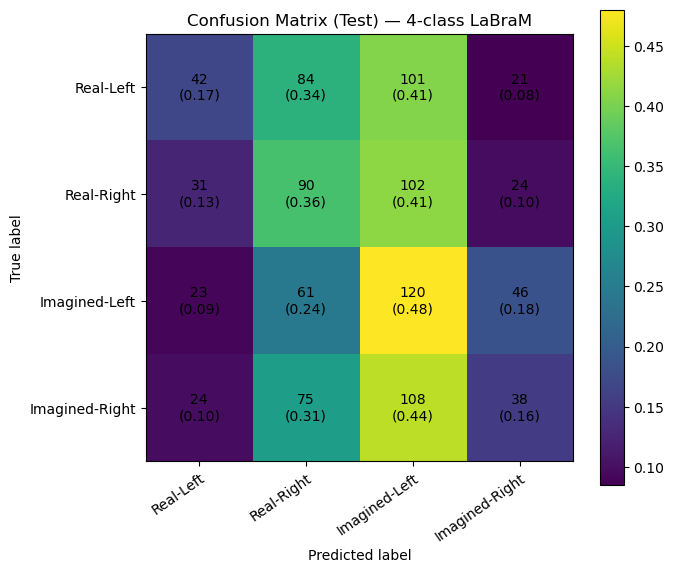


Per-class accuracy:
class 0 (Real-Left) acc: 0.1694  (n=248)
class 1 (Real-Right) acc: 0.3644  (n=247)
class 2 (Imagined-Left) acc: 0.4800  (n=250)
class 3 (Imagined-Right) acc: 0.1551  (n=245)

By task_type:
task_type=imagined | acc=0.3192 | n=495
task_type=real     | acc=0.2667 | n=495

By run:
run= 3 | acc=0.2788 | n=165
run= 4 | acc=0.3152 | n=165
run= 7 | acc=0.2303 | n=165
run= 8 | acc=0.3333 | n=165
run=11 | acc=0.2909 | n=165
run=12 | acc=0.3091 | n=165

By (task_type, run):
  imagined run= 3 | acc=nan | n=0
  imagined run= 4 | acc=0.3152 | n=165
  imagined run= 7 | acc=nan | n=0
  imagined run= 8 | acc=0.3333 | n=165
  imagined run=11 | acc=nan | n=0
  imagined run=12 | acc=0.3091 | n=165
  real     run= 3 | acc=0.2788 | n=165
  real     run= 4 | acc=nan | n=0
  real     run= 7 | acc=0.2303 | n=165
  real     run= 8 | acc=nan | n=0
  real     run=11 | acc=0.2909 | n=165
  real     run=12 | acc=nan | n=0


In [6]:
# Step 8 — Test evaluation from best checkpoint (4-class)
# - accuracy
# - confusion matrix (counts + normalized)
# - per-class accuracy
# - breakdown by task_type and run

from pathlib import Path
import numpy as np
import torch
import matplotlib.pyplot as plt

BEST_PATH = Path.cwd() / "training_logs" / "labram_physionet_4class_allruns" / "best.pth"
print("Loading best checkpoint:", BEST_PATH)

ckpt = torch.load(BEST_PATH, map_location="cpu")
model.load_state_dict(ckpt["model"])
model.eval()

# --- label schema used in your 4-class dataloader (adjust if you encoded differently!)
# Common choice:
# 0 = real-left, 1 = real-right, 2 = imagined-left, 3 = imagined-right
LABEL_NAMES = {
    0: "Real-Left",
    1: "Real-Right",
    2: "Imagined-Left",
    3: "Imagined-Right",
}

all_preds = []
all_labels = []
all_runs = []
all_task_types = []

with torch.no_grad():
    for batch in test_loader:
        x = batch["inputs"].to(device, non_blocking=True)
        y = batch["labels"].to(device, non_blocking=True)

        logits = model(x, input_chans=input_chans)
        preds = logits.argmax(dim=1)

        all_preds.append(preds.detach().cpu().numpy())
        all_labels.append(y.detach().cpu().numpy())

        # meta is dict-of-tensors / dict-of-lists (your loader returns dict)
        meta = batch["meta"]
        all_runs.append(meta["run"].detach().cpu().numpy())
        # task_type is a list of strings (kept as python objects)
        all_task_types.extend(list(meta["task_type"]))

all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)
all_runs = np.concatenate(all_runs)

test_acc = float((all_preds == all_labels).mean())
print(f"TEST acc: {test_acc:.4f}  (n={len(all_labels)})")

# -----------------------------
# Confusion matrix (counts)
# -----------------------------
K = 4
cm = np.zeros((K, K), dtype=int)
for t, p in zip(all_labels, all_preds):
    cm[int(t), int(p)] += 1

print("Confusion matrix (rows=true, cols=pred):")
print(cm)

# As a readable table
print("\nConfusion matrix table (counts):")
header = "true\\pred | " + " | ".join([f"{i}:{LABEL_NAMES[i]}" for i in range(K)])
print(header)
print("-" * len(header))
for i in range(K):
    row = " | ".join([str(cm[i, j]) for j in range(K)])
    print(f"{i}:{LABEL_NAMES[i]:<13} | {row}")

# -----------------------------
# Plot confusion matrix
# -----------------------------
def plot_cm(cm_counts, title):
    labels = [LABEL_NAMES[i] for i in range(K)]
    cm_norm = cm_counts / np.clip(cm_counts.sum(axis=1, keepdims=True), 1, None)

    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(cm_norm, interpolation="nearest")
    ax.figure.colorbar(im, ax=ax)

    ax.set(
        xticks=np.arange(K),
        yticks=np.arange(K),
        xticklabels=labels,
        yticklabels=labels,
        ylabel="True label",
        xlabel="Predicted label",
        title=title,
    )
    plt.setp(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")

    # annotate with counts + normalized
    for i in range(K):
        for j in range(K):
            ax.text(
                j, i,
                f"{cm_counts[i, j]}\n({cm_norm[i, j]:.2f})",
                ha="center", va="center"
            )

    fig.tight_layout()
    plt.show()

plot_cm(cm, "Confusion Matrix (Test) — 4-class LaBraM")

# -----------------------------
# Per-class accuracy
# -----------------------------
print("\nPer-class accuracy:")
for cls in range(K):
    mask = (all_labels == cls)
    acc_cls = float((all_preds[mask] == cls).mean()) if mask.any() else float("nan")
    print(f"class {cls} ({LABEL_NAMES[cls]}) acc: {acc_cls:.4f}  (n={int(mask.sum())})")

# -----------------------------
# Breakdown by task_type and run
# -----------------------------
def acc_on_mask(mask):
    if not np.any(mask):
        return float("nan"), 0
    return float((all_preds[mask] == all_labels[mask]).mean()), int(mask.sum())

print("\nBy task_type:")
for tt in ["imagined", "real"]:
    mask = np.array([t == tt for t in all_task_types], dtype=bool)
    a, n = acc_on_mask(mask)
    print(f"task_type={tt:<8} | acc={a:.4f} | n={n}")

print("\nBy run:")
for r in sorted(set(all_runs.tolist())):
    mask = (all_runs == r)
    a, n = acc_on_mask(mask)
    print(f"run={int(r):>2d} | acc={a:.4f} | n={n}")

print("\nBy (task_type, run):")
for tt in ["imagined", "real"]:
    for r in sorted(set(all_runs.tolist())):
        mask_tt = np.array([t == tt for t in all_task_types], dtype=bool)
        mask = mask_tt & (all_runs == r)
        a, n = acc_on_mask(mask)
        print(f"  {tt:<8} run={int(r):>2d} | acc={a:.4f} | n={n}")